#   Probabilistic Numerical xCFC formulation
### (linearized and assuming spherical symmetry)
---

Domain $[0, R]$, choose basis functions that already satisfy the boundary conditions.
\begin{align}
    \phi_{n}(r) \ \equiv \ \sqrt{2} \, \sin(n \pi r / R) \, / \, r
\end{align}

\begin{align}
    \left( \partial_{r}^{2} \, + \, \frac{2}{r} \, \partial_{r} \, - \, k^{2}(r) \right) \phi_{n}(r)
    \ &= \
    \frac{1}{r} \left( \partial_{r}^{2} \, - \, k^{2}(r) \right) r \phi_{n}(r) \\
    \ &= \
    \left( \left(\frac{n \pi}{R}\right)^{2} \, - \, k^{2}(r) \right) \phi_{n}(r) \\
\end{align}

$$
j_{1}(r) \ \equiv \ \frac{\sin(r)}{r^2} - \frac{\cos (r)}{r}
$$

Domain $[0, R]$, choose basis functions that already satisfy the boundary conditions.
\begin{align}
    \phi_{n}(r) \ \equiv \ r \, j_{1}\left(\sqrt{\lambda_{n}} \, r\right)
\end{align}

where 

In [1]:
import numpy             as np
import sympy             as sp
import matplotlib.pyplot as plt
from scipy.optimize      import brentq
from scipy.integrate     import quad

N = 1000
R = 1.0

rs = np.linspace(0.0, R, N)

j1 = lambda r: np.sin(r)/r**2 - np.cos(r)/r


def find_j1_root(n):

    # First root is trivially zero
    if n == 0:
        return 0.0

    # Start with an approximate guess based on root spacing
    approx   = (n + 0.5) * np.pi          # Good estimate for large n
    max_iter = 1000                        # Max attempts to bracket the root
    delta    = np.pi / (2.0 * max_iter)   # Step size to search around guess

    j1_root_func = lambda r: np.sin(r) / r - np.cos(r) 

    # Look for a sign change around the estimate
    for i in range(max_iter):
        a = np.float64(approx - delta * (i + 1))
        b = np.float64(approx + delta * (i + 1))
        if j1(a) * j1(b) < 0:
            root = brentq(j1_root_func, a, b, xtol=1.0e-17)
            return root
    raise ValueError(f"Could not bracket root #{n} after {max_iter} attempts.")


j1_roots = np.array([find_j1_root(n+1) for n in range(N)])

In [44]:
squared_norms_and_errors = np.array([quad(lambda r: (r * j1(j1_root * r))**2, 0.0, 1.0, limit=2500, epsabs=1.0e-16) for j1_root in j1_roots])

/var/folders/2r/cz0400ln7897s0p8fw_dfqmcdpknvq/T/ipykernel_51538/831018234.py:1: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  squared_norms_and_errors = np.array([quad(lambda r: (r * j1(j1_root * r))**2, 0.0, 1.0, limit=2500, epsabs=1.0e-16) for j1_root in j1_roots])


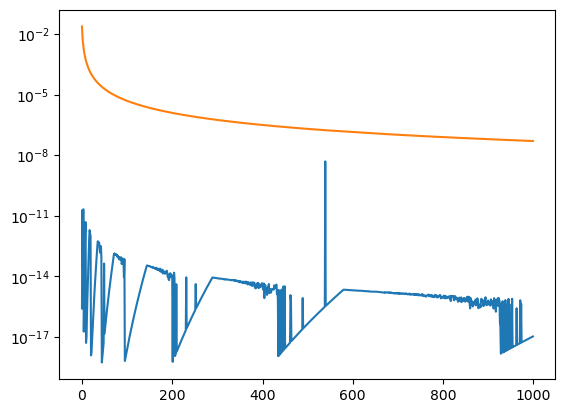

In [45]:
plt.plot(squared_norms_and_errors[:,1])
plt.plot(squared_norms_and_errors[:,0])
plt.yscale('log')

In [48]:
phi = lambda n, r: r * j1(j1_roots[n] * r) / np.sqrt(squared_norms_and_errors[n,0])

/var/folders/2r/cz0400ln7897s0p8fw_dfqmcdpknvq/T/ipykernel_51538/1660535995.py:12: RuntimeWarning: invalid value encountered in divide
  j1 = lambda r: np.sin(r)/r**2 - np.cos(r)/r
/var/folders/2r/cz0400ln7897s0p8fw_dfqmcdpknvq/T/ipykernel_51538/1660535995.py:12: RuntimeWarning: divide by zero encountered in divide
  j1 = lambda r: np.sin(r)/r**2 - np.cos(r)/r


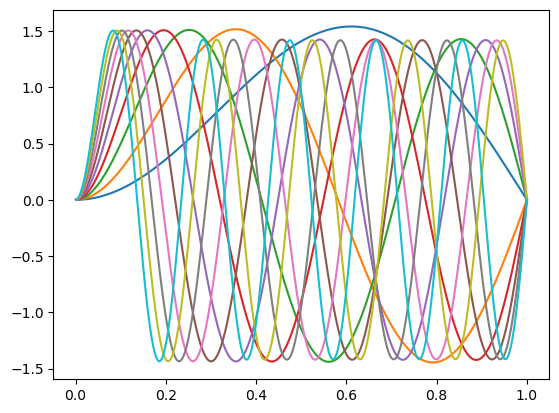

In [50]:
for n in range(10):
    plt.plot(rs, phi(n,rs))

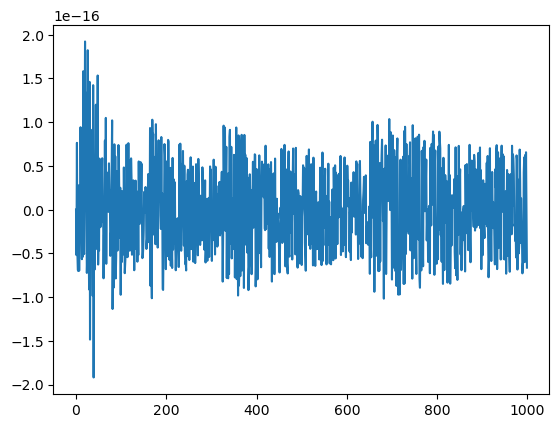

In [51]:
plt.plot(j1(j1_roots))

In [52]:
D = np.empty((N-2,N-2))
for i, r in enumerate(rs[1:-1]):
    for n in range(N-2):
        D[i,n] = phi(n, r)

In [53]:
D

array([[ 9.77036588e-06,  2.84245678e-05,  5.63972120e-05, ...,
         1.41771799e+00,  1.41632467e+00,  1.41492020e+00],
       [ 3.90812263e-05,  1.13696231e-04,  2.25580785e-04, ...,
        -1.41758675e+00, -1.41627744e+00, -1.41491495e+00],
       [ 8.79318697e-05,  2.55808872e-04,  5.07526533e-04, ...,
         1.41736804e+00,  1.41619872e+00,  1.41490620e+00],
       ...,
       [ 1.90824832e-02, -3.28054322e-02,  4.63004432e-02, ...,
        -3.33546046e-02,  2.00150345e-02, -6.67368311e-03],
       [ 1.27218486e-02, -2.18713414e-02,  3.08699752e-02, ...,
         2.22375477e-02, -1.33436029e-02,  4.44913034e-03],
       [ 6.36098228e-03, -1.09359867e-02,  1.54358916e-02, ...,
        -1.11191171e-02,  6.67187526e-03, -2.22456747e-03]])

In [54]:
np.linalg.det(D)

/Users/frederikd/micromamba/envs/grhd/lib/python3.12/site-packages/numpy/linalg/_linalg.py:2371: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


np.float64(-inf)

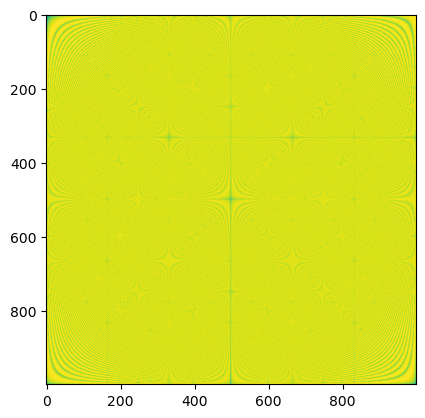

In [55]:
plt.imshow(np.log(np.abs(D)))

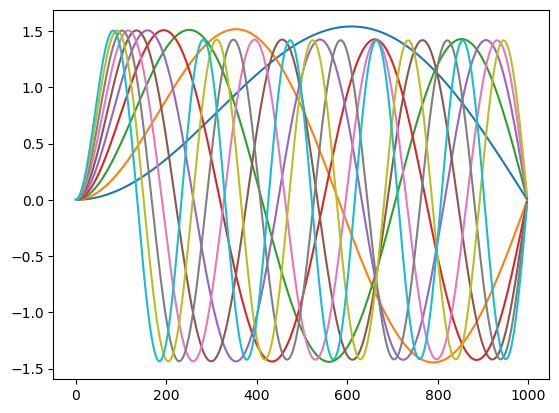

In [56]:
for n in range(10):
    plt.plot(D[:,n])

In [57]:
np.linalg.cond(D)

np.float64(1.0001575162624656)

In [58]:
D.T @ D

array([[ 9.99000000e+02,  5.11590770e-13,  1.70530257e-13, ...,
        -1.83741911e-13, -6.11510842e-13, -1.26931798e-12],
       [ 5.11590770e-13,  9.99000000e+02, -1.70530257e-13, ...,
        -2.58459920e-13, -4.21107593e-13,  8.01358979e-13],
       [ 1.70530257e-13, -1.70530257e-13,  9.99000000e+02, ...,
         4.89164265e-13,  1.24422694e-12,  8.34554648e-13],
       ...,
       [-1.83741911e-13, -2.58459920e-13,  4.89164265e-13, ...,
         9.98999686e+02,  5.99762059e-04, -1.36049787e-03],
       [-6.11510842e-13, -4.21107593e-13,  1.24422694e-12, ...,
         5.99762059e-04,  9.98998640e+02,  4.14253345e-03],
       [-1.26931798e-12,  8.01358979e-13,  8.34554648e-13, ...,
        -1.36049787e-03,  4.14253345e-03,  9.98976355e+02]])

In [63]:
np.max(D.T @ D)

np.float64(999.0000000000035)

In [64]:
np.min(D.T @ D)

np.float64(-0.0013604978652210775)

In [65]:
np.min(np.abs(D.T @ D))

np.float64(0.0)

/var/folders/2r/cz0400ln7897s0p8fw_dfqmcdpknvq/T/ipykernel_51538/3386523807.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(np.abs(D.T @ D)))


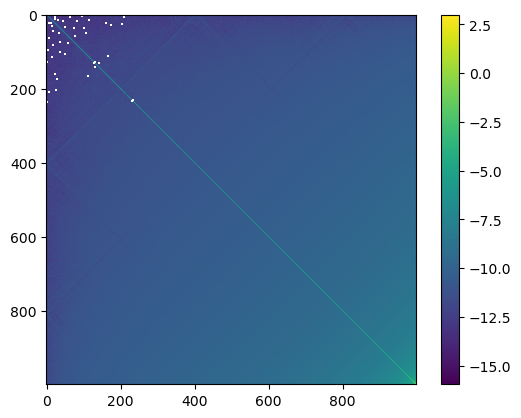

In [67]:
plt.imshow(np.log10(np.abs(D.T @ D)))
plt.colorbar()

In [144]:
np.linalg.cond(D @ D.T)

np.float64(464365.80812791915)

In [145]:
np.linalg.cond(D.T @ D)

np.float64(464365.80812837323)

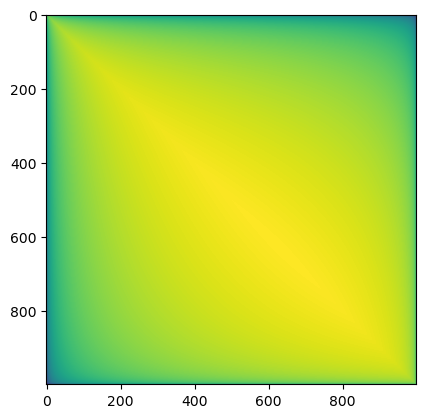

In [146]:
plt.imshow(np.log(D @ D.T))

In [ ]:


def Phi(r):

    np.arange()

In [128]:
r, R, a = sp.symbols('r, R, a')

sp.limit(r * (sp.sin(a * r) / (a * r)**2 - sp.cos(a * r) / (a * r)), r, 0)

0

In [129]:
phi = sp.sqrt(2) * sp.sin(n * sp.pi * r / R) / r

phi = sp.sin(n * sp.pi * r / R)**2 

a =  sp.diff(sp.diff(phi, r), r).simplify()
b = (sp.diff(2 * phi, r) / r).simplify()
c = 2 * phi / r**2
(a + b - c).simplify()

-2*sin(9*pi*r/R)**2/r**2 + 18*pi*sin(18*pi*r/R)/(R*r) + 162*pi**2*cos(18*pi*r/R)/R**2

In [130]:
r * (sp.sin(a * r) / (a * r)**2 - sp.cos(a * r) / (a * r))

r*(R**4*sin(162*pi**2*r*cos(18*pi*r/R)/R**2)/(26244*pi**4*r**2*cos(18*pi*r/R)**2) - R**2*cos(162*pi**2*r*cos(18*pi*r/R)/R**2)/(162*pi**2*r*cos(18*pi*r/R)))